In [1]:
# import the MCPy python class
from MCPy.MCPy import *
import math
import numpy as np

In [2]:
# initialize all variables
# x_n = MCPy(IA_n, MC_n, SG_n)

x1 = MCPy(np.array([1, 5]), np.array([3, 3]), np.matrix([[1, 1], [0, 0]]))
x2 = MCPy(np.array([-2, -1]), np.array([-1.5, -1.5]), np.matrix([[0, 0], [1, 1]]))

In [3]:
# do the calculation
# f.MC[0] is the vales of convex underestimator
# f.MC[1] is the vales of concave overestimator

f1 = exp(x1**3)
print(f1.IA)
print(f1.MC)
print(f1.SG)
print("The convex underestimator is: ", f1.MC[0])
print("The concave overestimator is: ", f1.MC[1])

[  2.71828183e+00   1.93557604e+54]
[  5.98741417e+04   9.67788021e+53]
[[  4.19118992e+05   4.83894011e+53]
 [  0.00000000e+00   0.00000000e+00]]
The convex underestimator is:  59874.1417152
The concave overestimator is:  9.67788021018e+53


In [4]:
# another example
f2 = x1**(3)/sqrt(x1)*x2

print("The convex underestimator is: ", f2.MC[0])
print("The concave overestimator is: ", f2.MC[1])

The convex underestimator is:  -125.223606798
The concave overestimator is:  -5.27309302194


In [267]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def OneVariablePlot(LB, UB, nx, fun):    
    x_points = np.linspace(LB,UB,nx)
    cv_points = np.zeros(nx)
    cc_points = np.zeros(nx)
    y_points = np.zeros(nx)

    index = 0
    for x in x_points:
        x_MCPy = MCPy(np.array([LB,UB]), np.array([x, x]), np.matrix([[1, 1]]))
        f_MCPy = fun(x_MCPy)
        cv_points[index] = f_MCPy.MC[0]
        cc_points[index] = f_MCPy.MC[1]
        y_points[index] = fun(x)
        index += 1

    p1, = plt.plot(x_points, y_points, color="black") 
    p2, = plt.plot(x_points, cv_points, color="red")        
    p3, = plt.plot(x_points, cc_points, color="blue") 
    plt.legend([p1,p2,p3], ['f','convex','concave'])

    plt.show()

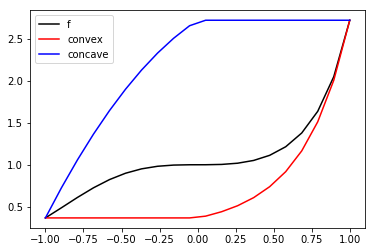

In [268]:
nx = 20
LB = -1
UB = 1
fun=lambda x: exp(x**3)

OneVariablePlot(LB, UB, nx, fun)

In [293]:
def TwoVariablesPlot(LB, UB, n_x1, n_x2, fun):    
    
    x1_points = np.linspace(LB[0], UB[0], n_x1)
    x2_points = np.linspace(LB[1], UB[1], n_x2)

    cv_points = np.zeros((n_x1, n_x2))
    cc_points = np.zeros((n_x1, n_x2))
    y_points = np.zeros((n_x1, n_x2))

    index1 = 0
    index2 = 0
    for x1 in x1_points:
        for x2 in x2_points:
            x1_MCPy = MCPy(np.array([LB[0],UB[0]]), np.array([x1, x1]), np.matrix([[1, 1], [0, 0]]))
            x2_MCPy = MCPy(np.array([LB[1],UB[1]]), np.array([x2, x2]), np.matrix([[0, 0], [1, 1]]))
            f_MCPy = fun(x1_MCPy, x2_MCPy)
            cv_points[index1, index2] = f_MCPy.MC[0]
            cc_points[index1, index2] = f_MCPy.MC[1]
            y_points[index1, index2] = fun(x1, x2)
            index2 += 1
        index1 += 1
        index2 = 0

    fig = plt.figure(figsize=(8,5))
    ax = fig.gca(projection='3d')

    X, Y = np.meshgrid(x1_points, x2_points)
    p1 = ax.plot_wireframe(X, Y, y_points.T,  rstride=1, cstride=1, color="black") 
    p2 = ax.plot_wireframe(X, Y, cv_points.T,  rstride=1, cstride=1, color="red")        

    ax.view_init(20, 200)
    ax.set_xticks(np.linspace(LB[0], UB[0], 5))                               
    ax.set_yticks(np.linspace(LB[1], UB[1], 5))                               
    ax.set_zticks([])
    ax.set_title('convex relaxations')
    ax.legend([p1,p2],['f','convex'])
    plt.show()

    fig = plt.figure(figsize=(8,5))
    ax = fig.gca(projection='3d')
    p3 = ax.plot_wireframe(X, Y, y_points.T,  rstride=1, cstride=1, color="black") 
    p4 = ax.plot_wireframe(X, Y, cc_points.T,  rstride=1, cstride=1, color="blue") 
    ax.view_init(20, 160)
    ax.set_xticks(np.linspace(LB[0], UB[0], 5))                               
    ax.set_yticks(np.linspace(LB[1], UB[1], 5))                               
    ax.set_zticks([])
    ax.set_title('concave relaxations')
    ax.legend([p3,p4],['f','concave'])
    plt.show()


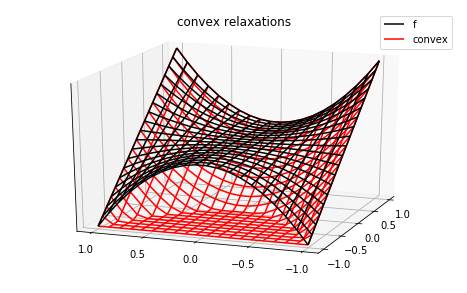

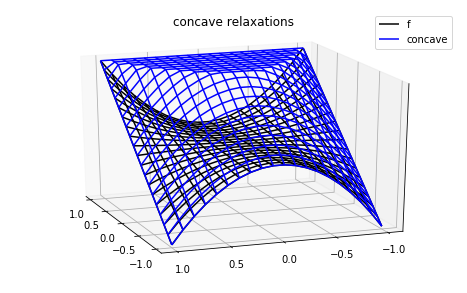

In [296]:
n_x1 = 20
n_x2 = 20
LB = [-1, -1]
UB = [1, 1]
fun=lambda x1, x2: x1*x2**(2)

TwoVariablesPlot(LB, UB, n_x1, n_x2, fun)